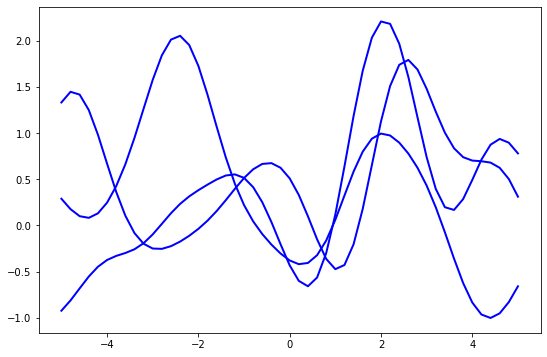

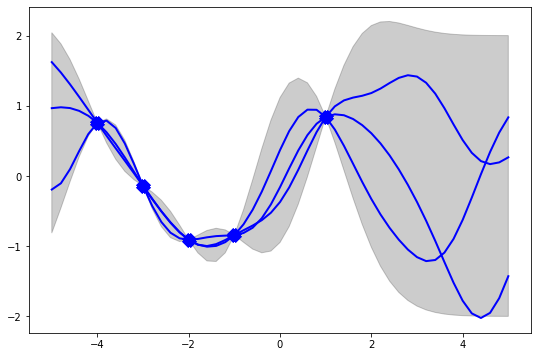

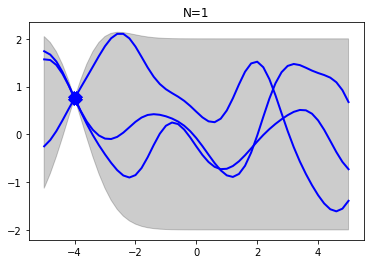

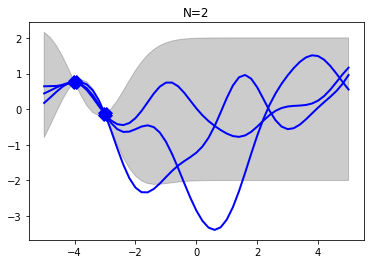

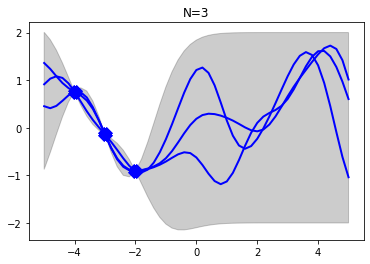

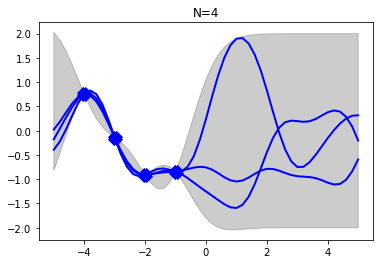

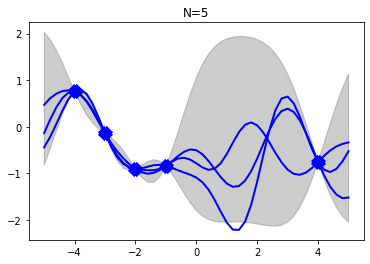

In [3]:
# import superimport

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import cholesky
from scipy.spatial.distance import cdist
# import pyprobml_utils as pml

def gaussSample(mu, sigma, n):
    A = cholesky(sigma)
    Z = np.random.normal(loc=0, scale=1, size=(len(mu), n))
    return np.dot(A, Z).T + mu

def mu_fun(x):
    return np.zeros_like(np.ravel(x))

def kfn(x, z):
    L = 1
    return 1*np.exp(-(cdist(x/L, z/L)**2)/2)

np.random.seed(10)
L = 1
xs = np.arange(-5, 5.2, 0.2)[..., np.newaxis]
ns = len(xs)
keps = 1e-8
color_1 = 'b' #'#984ea3'
color_2 = 'k' # '#e41a1c'
fig, ax1 = plt.subplots(1, 1, figsize=(9, 6))

# plot sampled functions from the prior
for i in range(3):
    mu = mu_fun(xs)
    sigma = kfn(xs, xs) + 1e-15 * np.eye(len(xs))
    fs = gaussSample(mu, sigma, 1)
    ax1.plot(np.ravel(xs), np.ravel(fs), color=color_1, linestyle='-', linewidth=2)

# pml.savefig('gprDemoNoiseFreePrior.pdf')

# generate noise-less training data
Xtrain = np.array([[-4], [-3], [-2], [-1], [1]])
ftrain = np.sin(Xtrain)

K = kfn(Xtrain, Xtrain)
Ks = kfn(Xtrain, xs)
Kss = kfn(xs, xs) + keps * np.eye(len(xs))
Ki = np.linalg.inv(K)
postMu = mu_fun(xs)[..., np.newaxis] + np.dot(Ks.T, np.dot(Ki, (ftrain - mu_fun(Xtrain)[..., np.newaxis])))
postCov = Kss - np.dot(Ks.T, np.dot(Ki, Ks))

fig, ax2 = plt.subplots(1, 1, figsize=(9, 6))

mu = np.ravel(postMu)
S2 = np.diag(postCov)
f = np.concatenate([mu + 2 * np.sqrt(S2), np.flip(mu - 2 * np.sqrt(S2), axis=0)])
ax2.fill(np.concatenate([xs, np.flip(xs, axis=0)]), f, color=color_2, alpha=0.2)

for i in range(3):
    mu = np.ravel(postMu)
    sigma = postCov
    fs = gaussSample(mu, sigma, 1)
    ax2.plot(np.ravel(xs), np.ravel(fs), color=color_1, linestyle='-', linewidth=2)
    ax2.scatter(Xtrain, ftrain, color=color_1, marker='x', linewidth=12)
# pml.savefig('gprDemoNoiseFreePost.pdf')

# Generate sequence of plots using subsets of data
XtrainAll = np.array([[-4], [-3], [-2], [-1], [4]])

#fig, ax = plt.subplots(1, 5, figsize=(20, 4))

for n in range(len(XtrainAll)):
    Xtrain = XtrainAll[:n + 1]
    ftrain = np.sin(Xtrain)

    K = kfn(Xtrain, Xtrain)
    Ks = kfn(Xtrain, xs)
    Kss = kfn(xs, xs) + keps * np.eye(len(xs))
    Ki = np.linalg.inv(K)
    postMu = mu_fun(xs)[..., np.newaxis] + np.dot(Ks.T, np.dot(Ki, (ftrain - mu_fun(Xtrain)[..., np.newaxis])))
    postCov = Kss - np.dot(Ks.T, np.dot(Ki, Ks))

    mu = np.ravel(postMu)
    S2 = np.diag(postCov)
    f = np.concatenate([mu + 2 * np.sqrt(S2), np.flip(mu - 2 * np.sqrt(S2), axis=0)])
    fig, ax = plt.subplots()
    ax.fill(np.concatenate([xs, np.flip(xs, axis=0)]), f, color=color_2, alpha=0.2)

    for i in range(3):
        mu = np.ravel(postMu)
        sigma = postCov
        fs = gaussSample(mu, sigma, 1)
        ax.plot(np.ravel(xs), np.ravel(fs), color=color_1, linestyle='-', linewidth=2)
        ax.scatter(Xtrain, ftrain, color=color_1, marker='x', linewidth=12)

    ax.set_title('N={}'.format(n + 1))
#     pml.savefig(f'gprDemoNoiseFreePost_N{n+1}.pdf')

#pml.savefig('gprDemoNoiseFreePost_subplots.pdf')

plt.show()